# 피마 인디언의 당뇨병 발현 가능성의 이진 분류


* 컬럼
  * class - 당뇨병 발생 여부
  * thickness - 삼두근 피부 주름
  * plasma - 공복 혈당 농도
  
  
* To learn
    * 데이터프레임 조작
    * Plot


In [1]:
import tensorflow as tf
import numpy as np

print (tf.__version__)

2.0.0


In [5]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
# read data by numpy 
dataset = np.loadtxt("./dataset/pima-indians-diabetes.csv", delimiter=",")

In [7]:
dataset.shape

(768, 9)

In [8]:
x = dataset[:,0:8]

In [9]:
y = dataset[:,8]

In [10]:
# read data by Pandas
import pandas as pd

In [11]:
df = pd.read_csv("./dataset/pima-indians-diabetes.csv",
                 names=["pregnant", "plasma", "pressure", "thickness",
                        "insulin", "BMI", "pedigree", "age", "class"])

In [12]:
df.shape

(768, 9)

In [13]:
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.head(10)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
df.columns

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI',
       'pedigree', 'age', 'class'],
      dtype='object')

In [19]:
# df['pregnant']

In [20]:
df.loc[:3,['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0


In [21]:
# groupby([columns]).mean()
# groupby를 사용하면 기본으로 그룹 라벨이 index

df[['pregnant','class']].groupby(['pregnant'] , as_index=False
                                ).mean().sort_values(
                                    by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [22]:
# 그룹별 갯수
df.groupby('pregnant').size()

pregnant
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64

In [23]:
# agg: 그룹별 소계 - 평균, 합계, 사용자 함수

# df.groupby('pregnant').agg(np.mean) #np.sum

def my_mean(s):
    return np.mean(s)

df.groupby('pregnant').agg({'insulin':my_mean, 'age':np.mean})

,insulin,age
pregnant,,
0,81.675676,27.603604
1,98.674074,27.370370
2,85.844660,27.194175
3,87.453333,29.026667
4,69.441176,32.779412
5,57.298246,39.035088
6,63.580000,39.340000
7,84.466667,41.111111
8,92.815789,45.368421


In [24]:
# apply

df.groupby('pregnant', as_index=False
          ).apply(lambda d: (d.insulin * d.age).sum())

# ======= return Series
# def total_series(d):
#     return d.insulin * d.age

# df.groupby('pregnant', as_index=False
#           ).apply(total_series)

# ======= return dataframe with row_index
# def total_df(d):
#     return pd.DataFrame({
#         'total': d.price * d.quantity })

# ======= return dataframe with index instead of row_index
# def total_keepnoindex(d):
#     return pd.DataFrame({
#         'total': (d.price * d.quantity).sum()
#     }, index=['hoge'])


0     230403
1     381800
2     239784
3     185891
4     146034
5     116032
6     130915
7     161430
8     170435
9      74834
10     41407
11     34956
12     47922
13     12977
14      8464
15      4730
16      5358
dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

그래프 그리기 세부사항 
https://medium.com/@peteryun/python-matplotlib-기본-6e23e5fd2f16

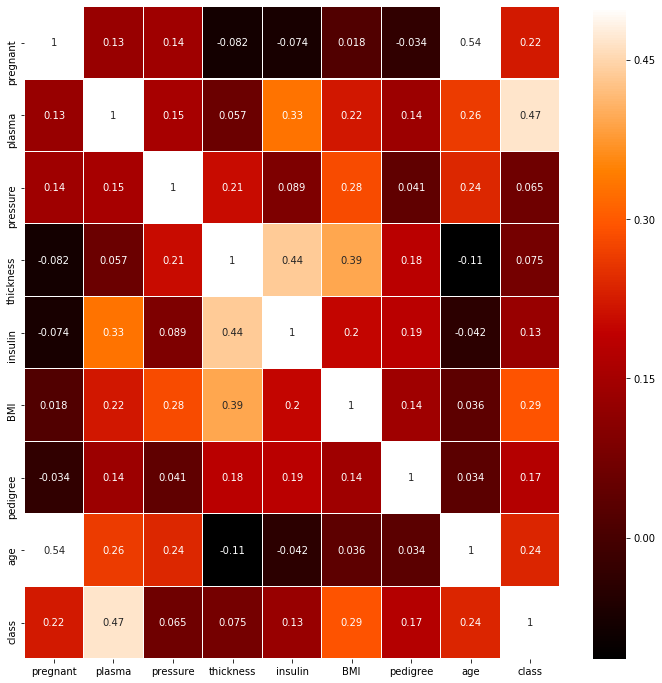

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, 
            cmap=plt.cm.gist_heat, linecolor='white', annot=True)

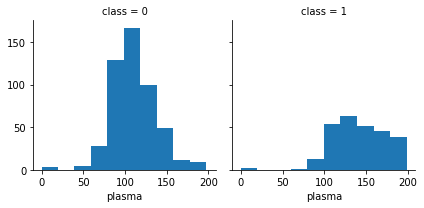

In [27]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

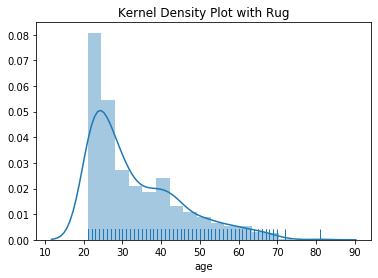

In [28]:
age = df['age']
sns.distplot(age, kde=True, rug=True)
plt.title("Kernel Density Plot with Rug")
plt.show()

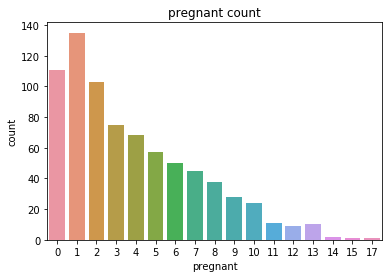

In [29]:
sns.countplot(x="pregnant", data=df)
plt.title("pregnant count")
plt.show()

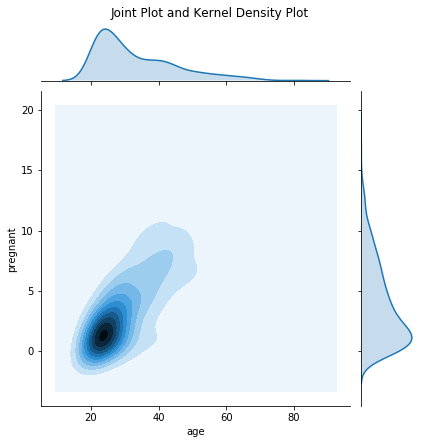

In [30]:
sns.jointplot(x="age", y="pregnant", data=df, kind="kde")
plt.suptitle("Joint Plot and Kernel Density Plot", y=1.02)
plt.show()

In [31]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

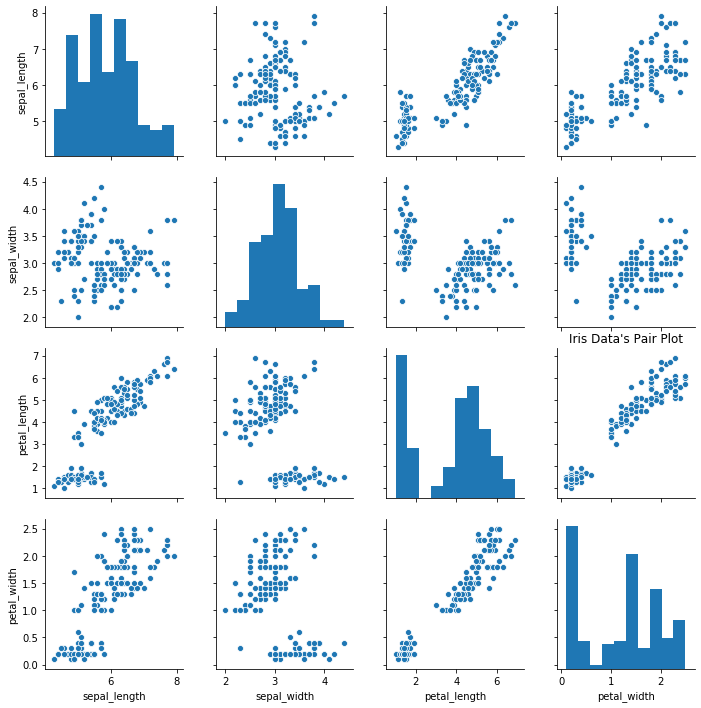

In [32]:
sns.pairplot(iris)
plt.title("Iris Data's Pair Plot")
plt.show()

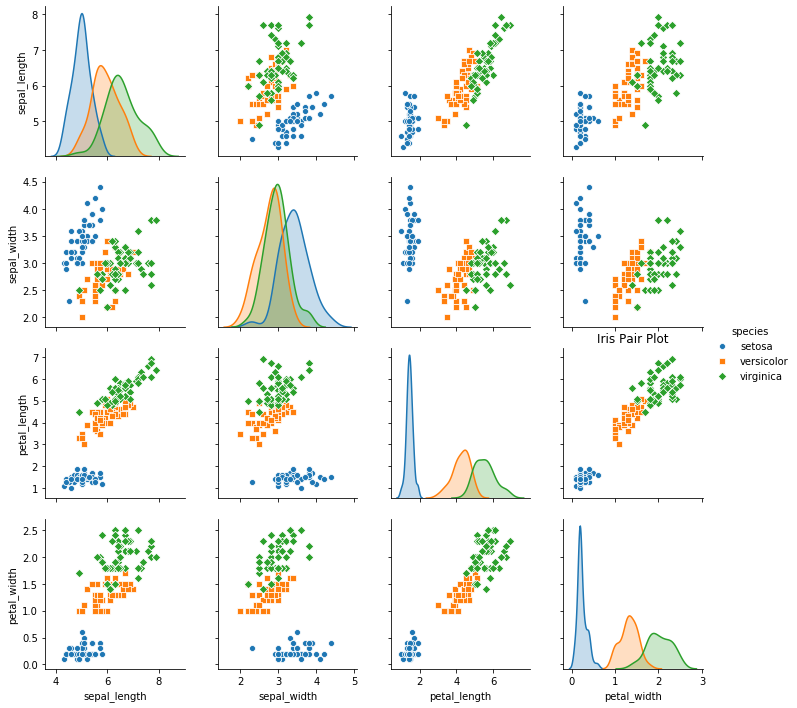

In [33]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot")
plt.show()

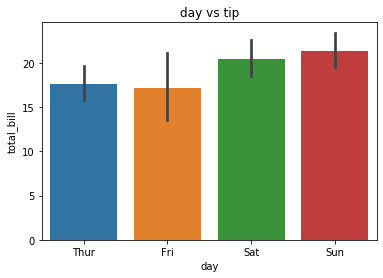

In [34]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("day vs tip")
plt.show()

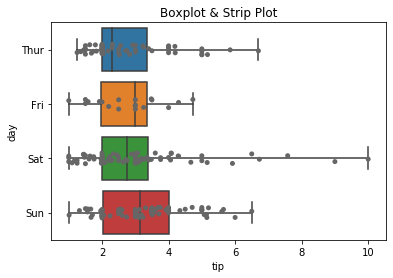

In [35]:
# sns.boxplot(x="day", y="total_bill", data=tips)
# plt.title("Box Plot")
# plt.show()

plt.title("Boxplot & Strip Plot")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

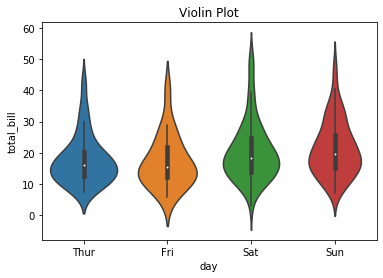

In [36]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("Violin Plot")
plt.show()

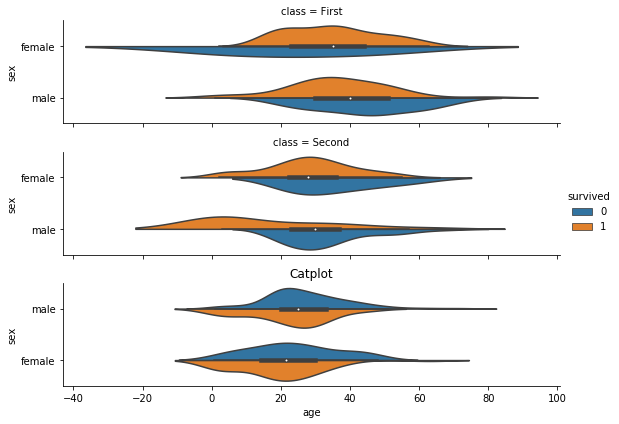

In [37]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("Catplot")
plt.show()

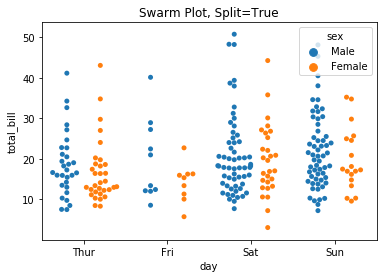

In [38]:
# sns.swarmplot(x="day", y="total_bill", data=tips)
# plt.title("Swarm Plot")
# plt.show()

sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("Swarm Plot, Split=True")
plt.show()

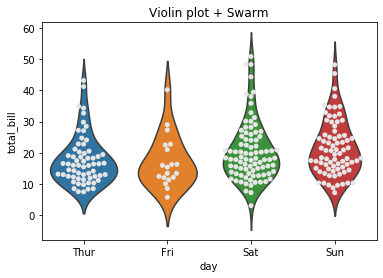

In [39]:
plt.title("Violin plot + Swarm")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

In [40]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_dim=8, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [41]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history =model.fit(x, y, epochs=200, batch_size=10)

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 1s 2ms/sample - loss: 7.1648 - accuracy: 0.6237
Epoch 2/200
768/768 [==============================] - 0s 170us/sample - loss: 2.1937 - accuracy: 0.6484
Epoch 3/200
768/768 [==============================] - 0s 166us/sample - loss: 1.3965 - accuracy: 0.6055
Epoch 4/200
768/768 [==============================] - 0s 217us/sample - loss: 1.0761 - accuracy: 0.6042
Epoch 5/200
768/768 [==============================] - 0s 177us/sample - loss: 0.8785 - accuracy: 0.6159
Epoch 6/200
768/768 [==============================] - 0s 156us/sample - loss: 0.7622 - accuracy: 0.6250
Epoch 7/200
768/768 [==============================] - 0s 156us/sample - loss: 0.7004 - accuracy: 0.6458
Epoch 8/200
768/768 [==============================] - 0s 186us/sample - loss: 0.6869 - accuracy: 0.6406
Epoch 9/200
768/768 [==============================] - 0s 200us/sample - loss: 0.6744 - accuracy: 0.6432
Epoch 10/200
768/768 [==============

768/768 [==============================] - 0s 245us/sample - loss: 0.5461 - accuracy: 0.7396
Epoch 78/200
768/768 [==============================] - 0s 181us/sample - loss: 0.5443 - accuracy: 0.7266
Epoch 79/200
768/768 [==============================] - 0s 186us/sample - loss: 0.5427 - accuracy: 0.7214
Epoch 80/200
768/768 [==============================] - 0s 178us/sample - loss: 0.5556 - accuracy: 0.7188
Epoch 81/200
768/768 [==============================] - 0s 178us/sample - loss: 0.5477 - accuracy: 0.7279
Epoch 82/200
768/768 [==============================] - 0s 183us/sample - loss: 0.5419 - accuracy: 0.7201
Epoch 83/200
768/768 [==============================] - 0s 158us/sample - loss: 0.5378 - accuracy: 0.7435
Epoch 84/200
768/768 [==============================] - 0s 157us/sample - loss: 0.5429 - accuracy: 0.7253
Epoch 85/200
768/768 [==============================] - 0s 178us/sample - loss: 0.5370 - accuracy: 0.7266
Epoch 86/200
768/768 [==============================] - 0s 

768/768 [==============================] - 0s 222us/sample - loss: 0.5035 - accuracy: 0.7630
Epoch 154/200
768/768 [==============================] - 0s 222us/sample - loss: 0.5019 - accuracy: 0.7526
Epoch 155/200
768/768 [==============================] - 0s 201us/sample - loss: 0.4975 - accuracy: 0.7656
Epoch 156/200
768/768 [==============================] - 0s 213us/sample - loss: 0.4968 - accuracy: 0.7656
Epoch 157/200
768/768 [==============================] - 0s 230us/sample - loss: 0.4951 - accuracy: 0.7656
Epoch 158/200
768/768 [==============================] - 0s 192us/sample - loss: 0.4957 - accuracy: 0.7695
Epoch 159/200
768/768 [==============================] - 0s 229us/sample - loss: 0.4954 - accuracy: 0.7656
Epoch 160/200
768/768 [==============================] - 0s 161us/sample - loss: 0.4981 - accuracy: 0.7656
Epoch 161/200
768/768 [==============================] - 0s 175us/sample - loss: 0.4936 - accuracy: 0.7656
Epoch 162/200
768/768 [============================

In [43]:
model.evaluate(x,y)[1]

768/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.77213544

In [44]:
y_loss= history.history['loss']

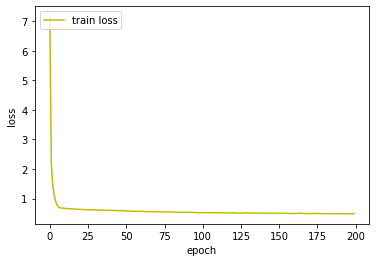

In [45]:
plt.plot(history.history['loss'], 'y', label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()